In [2]:
!pip install open-cv

ERROR: Could not find a version that satisfies the requirement open-cv (from versions: none)
ERROR: No matching distribution found for open-cv


Enter the image:lotus.jpg


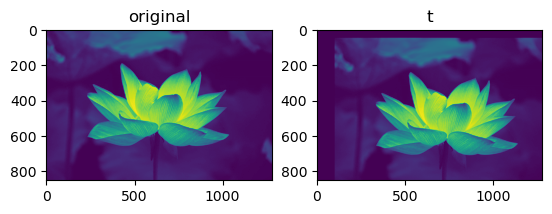

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img_path=input("Enter the image:")
img=cv2.imread(img_path,0)
rows,cols=img.shape
M=np.float32([[1,0,100],[0,1,50]])
dst=cv2.warpAffine(img,M,(cols,rows))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("t")
plt.imshow(dst)
plt.show()


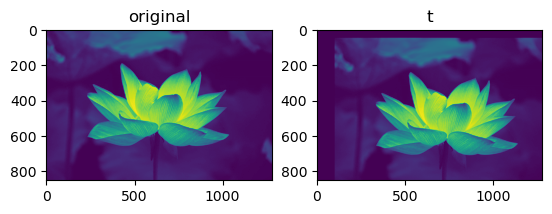

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("lotus.jpg",0)
rows,cols=img.shape
M=np.float32([[1,0,100],[0,1,50]])
dst=cv2.warpAffine(img,M,(cols,rows))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("t")
plt.imshow(dst)
plt.show()

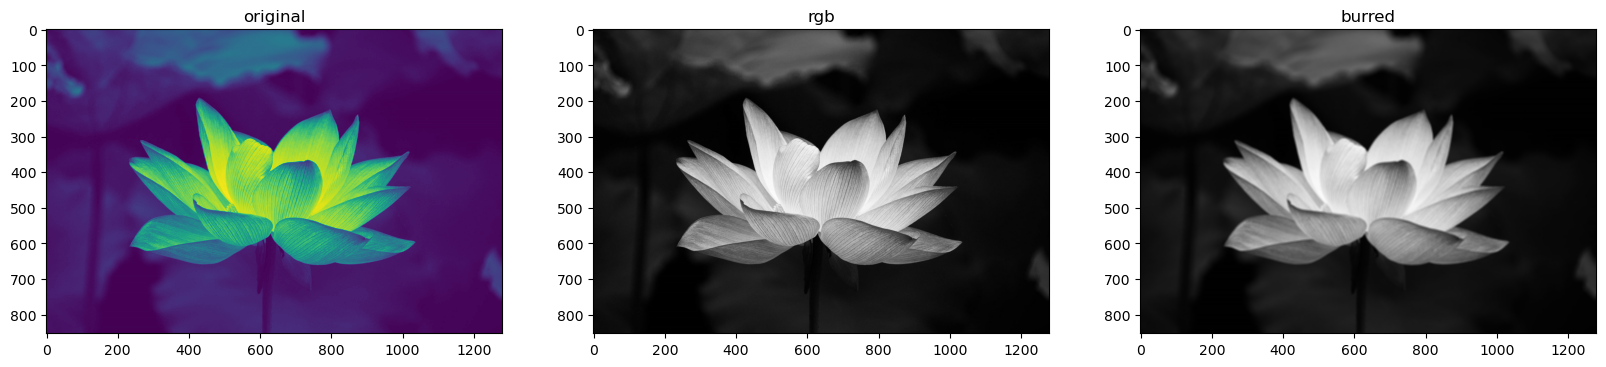

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("lotus.jpg",0)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur_img=cv2.GaussianBlur(img_rgb,(7,7),8)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(img)
plt.subplot(1,3,2)
plt.title("rgb")
plt.imshow(img_rgb)
plt.subplot(1,3,3)
plt.title("burred")
plt.imshow(blur_img)
plt.show()

Enter the image:lotus.jpg


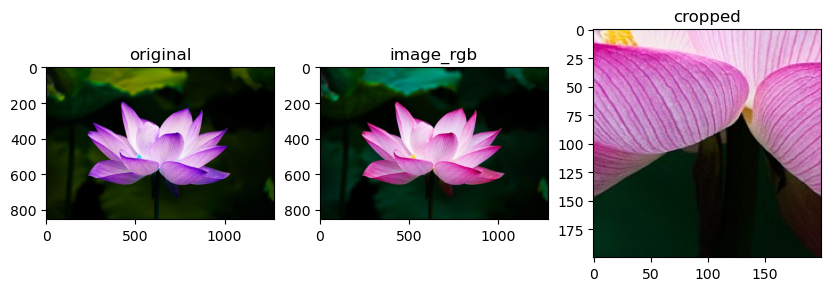

In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def crop_image(image,x,y,w,h):
    cropped_image=image[y:y+h,x:x+w]
    return cropped_image
image=input("Enter the image:")
image=cv2.imread(image)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
x=500
y=500
w=200
h=200
cropped_image=crop_image(image_rgb,x,y,w,h)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(image)
plt.subplot(1,3,2)
plt.title("image_rgb")
plt.imshow(image_rgb)
plt.subplot(1,3,3)
plt.title("cropped")
plt.imshow(cropped_image)
plt.show()

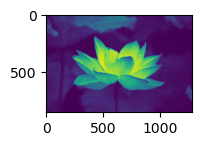

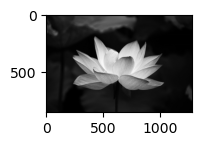

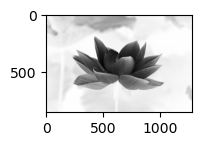

In [60]:
import cv2
img=cv2.imread('lotus.jpg',0)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
if img is not None:
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.show()
    plt.subplot(1,3,2)
    plt.imshow(img_rgb)
    plt.show()
else:
    print("Image not found!")
rows,cols,channels=img_rgb.shape
for i in range(rows):
    for j in range(cols):
        img_rgb[i,j]=255-img_rgb[i,j]

plt.subplot(1,3,2)
plt.imshow(img_rgb)
plt.show()

Enter the image:lotus.jpg


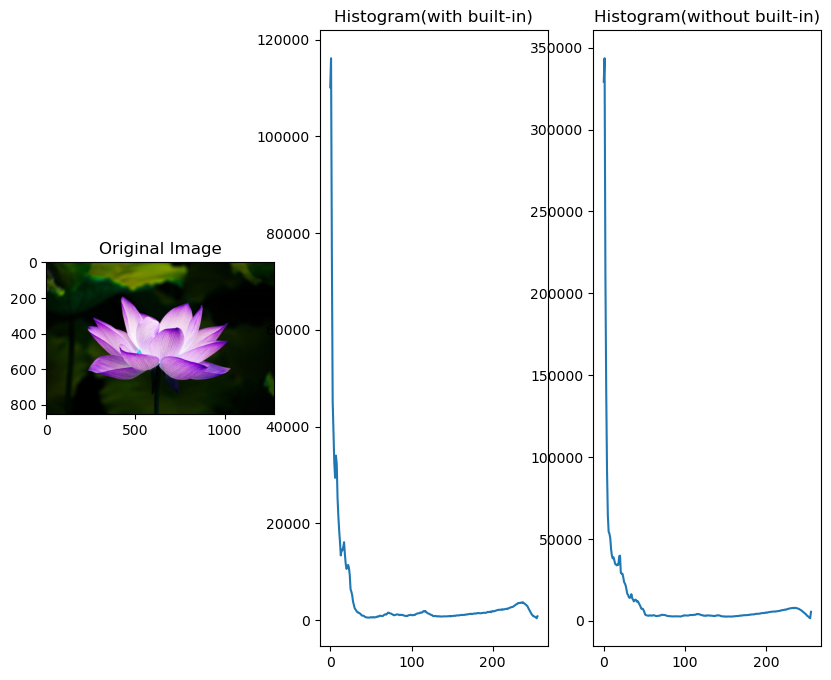

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculateHist(img):
    hist=np.zeros(256)
    rows,cols,channels=img.shape
    for i in range(rows):
        for j in range(cols):
            intensity=img[i,j]
            hist[intensity]+=1
    return hist
image=input("Enter the image:")
image=cv2.imread(image)

hist1=cv2.calcHist([image],[0],None,[256],[0,256])
hist2=calculateHist(image)

plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.plot(hist1)
plt.title("Histogram(with built-in)")

plt.subplot(1,3,3)
plt.plot(hist2)
plt.title("Histogram(without built-in)")
plt.show()

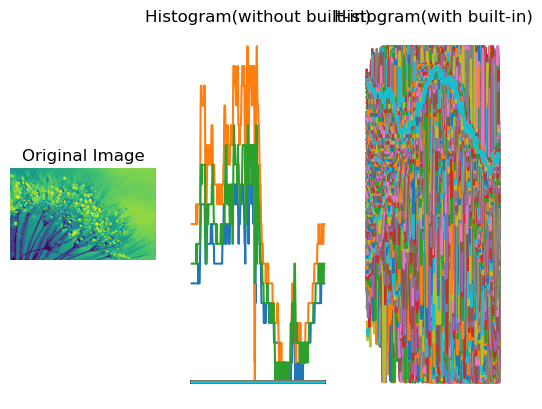

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def equalized_hist(image):
    equalized_image=np.zeros_like(image)
    for i in range(3):
        channel=image[:,i]
        histogram,_=np.histogram(channel.flatten(),bins=256,range=(0,255))
        cdf=histogram.cumsum()
        cdf_normalized=cdf*histogram.max()/cdf.max()
        equalized_channel=np.interp(channel.flatten(),range(256),cdf_normalized).reshape(channel.shape)
        equalized_image[:,i]=equalized_channel
    return equalized_image.astype(np.uint8)

image=cv2.imread("nature.jpg")

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

equalized_image=equalized_hist(image)
plt.subplot(1,3,2)
plt.plot(equalized_image)
plt.title("Histogram(without built-in)")
plt.axis('off')

equalized_image2=cv2.equalizeHist(image)
plt.subplot(1,3,3)
plt.plot(equalized_image2)
plt.title("Histogram(with built-in)")
plt.axis('off')
plt.show()

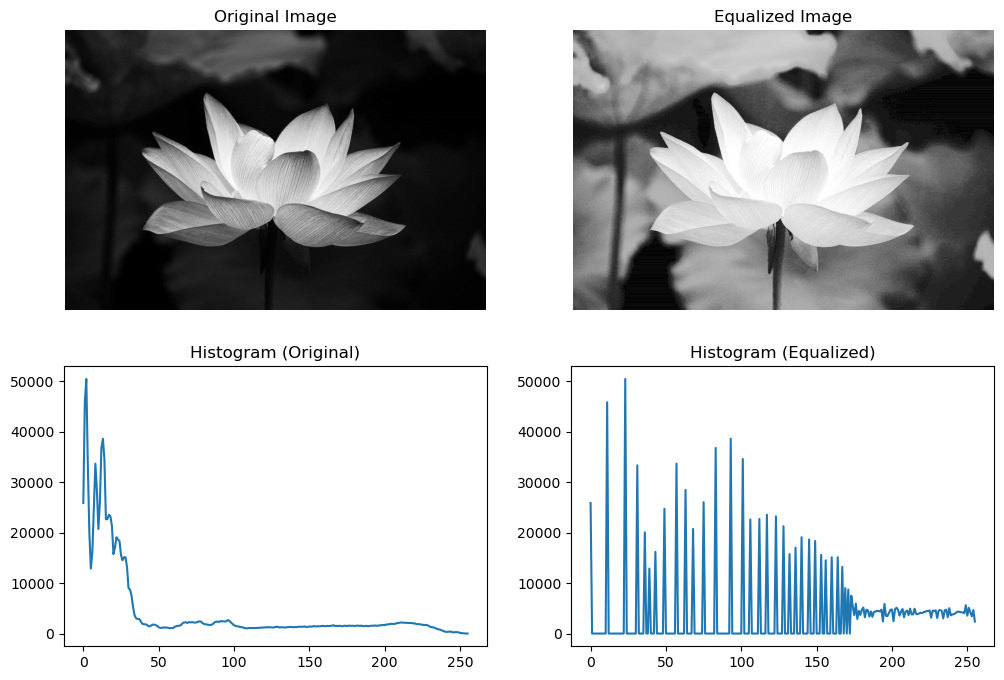

In [24]:
import cv2  
import matplotlib.pyplot as plt  
import numpy as np  
  
image = cv2.imread('lotus.jpg', 0)  
  
equalized_image = cv2.equalizeHist(image)  
  
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])  
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256]) 
  
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 2, 1) 
plt.title("Original Image") 
plt.imshow(image, cmap='gray') 
plt.axis('off') 
  
plt.subplot(2, 2, 2) 
plt.title("Equalized Image") 
plt.imshow(equalized_image, cmap='gray') 
plt.axis('off') 
 
plt.subplot(2, 2, 3) 
plt.title("Histogram (Original)") 
plt.plot(hist_original) 
 
plt.subplot(2, 2, 4) 
plt.title("Histogram (Equalized)") 
plt.plot(hist_eq) 
plt.show()

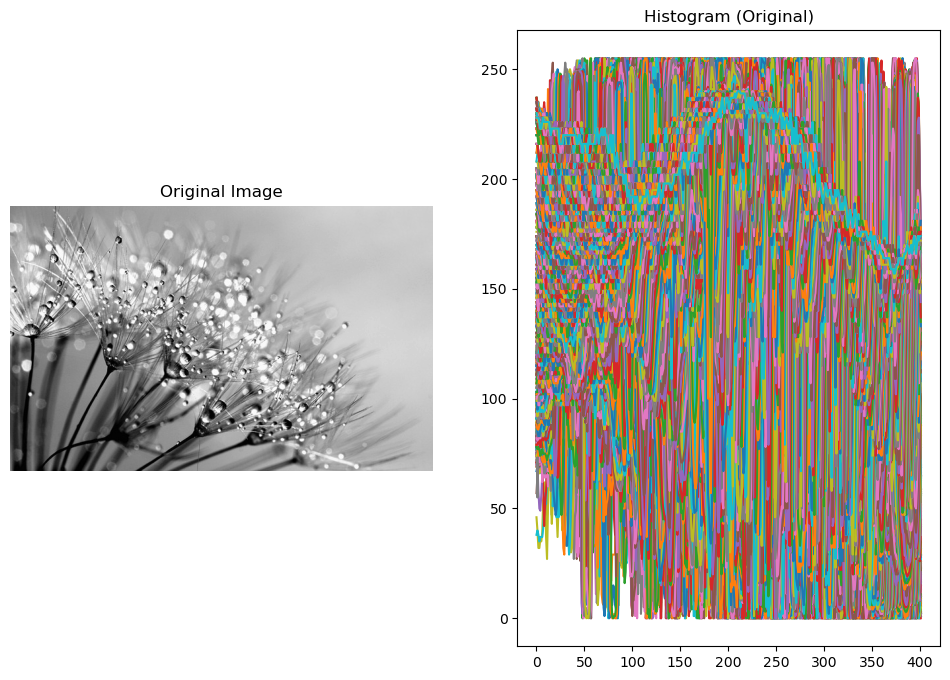

In [29]:
import cv2  
import matplotlib.pyplot as plt  
import numpy as np  
  
image = cv2.imread('nature.jpg',0)  
  
eq_img = cv2.equalizeHist(image)

plt.figure(figsize=(12, 8)) 
plt.subplot(1, 2, 1) 
plt.title("Original Image") 
plt.imshow(image, cmap='gray') 
plt.axis('off')

plt.subplot(1, 2, 2) 
plt.title("Histogram (Original)") 
plt.plot(eq_img)
plt.show()
 

Enter a image file name :: tree.jpg
Enter a image file name :: nature.jpg
Enter a image file name :: lotus.jpg
Enter a image file name :: tiger.jpeg
Enter a image file name :: tiger2.jpeg


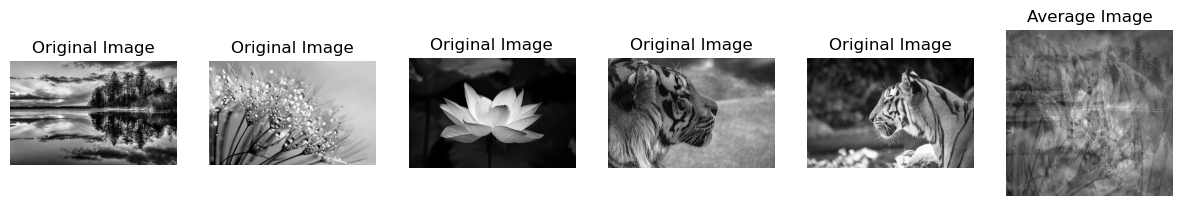

In [16]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
def read_image_file(root_directory):
    filename = input("Enter a image file name :: ")
    filepath = os.path.join(root_directory, filename)
    img = cv2.imread(filepath)
    return img
def average_images(image_list, target_size):
    avg_image = np.zeros(target_size, dtype=np.float32)
    for img in image_list:
        img = cv2.resize(img, target_size).astype(np.float32)
        avg_image += img
    avg_image /= len(image_list)
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)
    return avg_image
root_directory = os.getcwd()
imgList = []
n = 5
for i in range(n):
    original_image = read_image_file(root_directory)
    if original_image is None:
        print("Failed to load image")
    else:
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        imgList.append(gray_image)

target_size = (512, 512) #(rows,cols)-  images to the same size. can be set
average_image1 = average_images(imgList, target_size)
imgList.append(average_image1)
plt.figure(figsize=(15, 5))
try:
    for i in range(len(imgList)):
        plt.subplot(1, len(imgList), i+1)
        plt.imshow(imgList[i], cmap = 'gray')
        plt.axis('off')
        if i != len(imgList) - 1 :
            plt.title('Original Image')
        else:
            plt.title('Average Image')
except IndexError:
    print("5 images are not read properly.")